# Random walk decision making model simulations
Random walk decision making models are pervasive in psychology and neuroscience research. They also serve as a good example of how human intuition can lead one astray without the aid of a model. Here, we explore a simplified random walk model, focusing on the question of whether or not changes in drift rate modulates response speed.

In [1]:
# import required python libraries
%matplotlib inline
import numpy as np
import scipy
import random
import matplotlib.pylab as plt 
import seaborn as sns

## Random walk model definition
The `randomwalk` function defined below implements a simplified random walk model. This model is defined by three parameters:
1. `boundary` = distance of the response boundaries (default = 3)
2. `starting` = starting point of the evidence accumulation (default = 0)
3. `driftrate` = drift rate of the random walk (default = 0)

A final variable, `nreps`, can be passed to the function to set the number of random walk simulations the function call will perform (default = 1000). 

The function displays the number and mean/std of the response times of the simulations that reached the upper and lower boundary. The function also returns these RTs of upper and lower boundary responses. 

In [2]:
def randomwalk(boundary=3.0,starting=0.0,driftrate=0.0,nreps=1000):
    evidtime = []
    response = []
    rt = []
    for n in range(nreps):
        evidence = starting
        tmp = []
        while evidence<boundary and evidence>-boundary:
            tmp.append(evidence)
            if driftrate>(np.random.random()-0.5):
                evidence = evidence+0.1
            else:
                evidence = evidence-0.1
        if evidence>boundary:
            response.append(1)
            rt.append(len(tmp))
        else:
            response.append(0)
            rt.append(len(tmp))
        evidtime.append(tmp)
    rtupper = [rt[x] for x in range(n) if response[x]==1]
    rtlower = [rt[x] for x in range(n) if response[x]==0]
    if len(rtupper)>0:
        print('Upper: N %i, mean %.1f, std %.1f'%(len(rtupper),np.mean(rtupper),np.std(rtupper)))
    else:
        print('Upper: N 0')
        rtupper = []
    if len(rtlower)>0:
        print('Lower: N %i, mean %.1f, std %.1f'%(len(rtlower),np.mean(rtlower),np.std(rtlower)))
    else:
        print('Lower: N 0')
        rtlower = []
    return rtupper,rtlower,evidtime,response

## Simulation with default parameters
If we run the model with the default parameters, we find no difference in the number or speed of the responses to the upper and lower boundaries. This is because the drift rate is not biased toward either boundary (`driftrate` = 0):

Upper: N 6, mean 804.0, std 315.6
Lower: N 3, mean 1794.7, std 1163.6


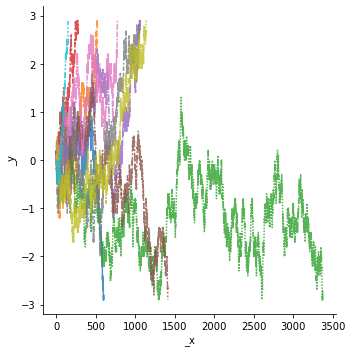

In [3]:
rtupper,rtlower,evid,resp = randomwalk(boundary=3.0,starting=0.0,driftrate=0.0,nreps=10)
sns.relplot(data=evid,legend=False,alpha=0.8,kind='line');

Although 10 repetitions is good for visualization, we need many more to get a sense of how these parameters actually impact model predictions. Let's try 10,000 instead:

In [4]:
rtupper,rtlower,evid,resp = randomwalk(boundary=3.0,starting=0.0,driftrate=0.0,nreps=10000)      

Upper: N 4981, mean 913.3, std 756.0
Lower: N 5018, mean 911.6, std 762.3


## Changes to the drift rate
The intuitive prediction, as discussed in Farrell & Lewandowsky (2010), is that increasing the drift rate to prefer the upper boundary will lead to faster upper boundary responses and slower lower boundary responses. Let's test it out:

In [5]:
rtupper,rtlower,evid,resp = randomwalk(boundary=3,starting=0.0,driftrate=0.025,nreps=10000)

Upper: N 9521, mean 547.1, std 387.3
Lower: N 478, mean 503.3, std 312.0


Surprisingly, increasing drift rate doesn't change response speed. It changes the proportion of responses that reach the boundaries; approximately 95% of the simulations hit the upper boundary. But, there is no effect on the average response speed. Re-run the previous cell a couple of times to see this (or increase `nreps` to 50000 and re-run the cell).

## What does change response speed?
If drift rate doesn't affect response speed, what does? Let's try changing the starting point. This parameter defines the baseline level of evidence, i.e., where the random walk begins its walk. You can think of this parameter as a pre-decision bias in the decision making process. If we change this to a slightly higher value (and put drift rate back to its default value of 0), what do we find?

In [6]:
rtupper,rtlower,evid,resp = randomwalk(boundary=3,starting=0.2,driftrate=0.0,nreps=10000)

Upper: N 5399, mean 851.5, std 736.7
Lower: N 4600, mean 943.2, std 717.1


Starting point seems to affect response speed! Let's go the other way:

In [7]:
rtupper,rtlower,evid,resp = randomwalk(boundary=3,starting=-0.2,driftrate=0.0,nreps=10000)

Upper: N 4697, mean 948.5, std 764.2
Lower: N 5302, mean 858.3, std 714.0


Yep, as you might have predicted, now responses to the lower boundary are faster. 

By simulating a random walk model, we are able to test the intuitive prediction that an increase to drift rate leads to faster upper and slower lower boundary responses. Interestingly, we find that starting point, rather than drift rate, has such an effect. The random walk model is conceptually simple, but its dynamics in practice are quite complex. Implementing the model and leveraging simulations allow for correct understanding of its predictions for decision making.